<a href="https://colab.research.google.com/github/zfe-dev/PySpark-GoogleColab-Introduction/blob/main/PySpark_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark

## History of Spark
First of all, Apache Hadoop has been used to distribute processing of large data sets accross clusters of computers using programming models. It's based on MapReduce (distribution, calcul et merge)

Spark has been released to improve computational speed. MapReduce produces too many intermediate IO with HDFS - Hadoop Distributed File System.

Spark uses Hadoop at least for storage but can also use it for processing, even if it has its own cluster management.

## Features of Spark
Extends base Hadoop MapReduce to use it for more types of computations:
* interactive queries: queries executed when needed
* stream processing: continious in real time ingestion/processing of data

Spark introduced RDDs (Resilient Distributed Dataset), that are stored in memory while being computed upon, eleminating many IOs.

## Stack
Spark is more focused on the computation part than the data storage part. A data warehouse and a cluster management is often provided in environment providing Spark.

* Spark Core: it's the core module of Spark, it contains all basic and general functionalities of Spark, like the API which defines RDDs all Spark computation processes are base on. Other Spark features are built upon this framework so Spark has a high modularity.
* Spark SQL: Provides standard DataFrames to interact with.
* Spark Streaming: In real time unbounded streams of data.
* MLlib: Machine Leaning algorithms implemented as Spark operations on RDDs.
* GraphX: Graph library

## RDD: Resilient Distributed Dataframe
RDD is a read-only collection of objects that are partitioned across a set of machines and stored in the memory for faster I/O operations.

Making compututations on a RDD creates a new one, so the Spark is mainly a collection of operations that create, transform and export RDDs.

Two types of operations can be applied to a RDD:
* Transformations: Getting an existing RDD, using a map-like operation on it transforming it and returning a new RDD (grouping, filtering)
* Actions: Getting an existing RDD and applying a reduce-like operation on it returning aggregate value (sum, mean). The RDD requires to be partitionned on this case (according to a key).

A RDD is parallilized in a way that operation of it are applied in parallel. RDD is one or more partitioned collections of data.

## Context
The Spark Context reprensents the connection to the Spark cluster. It is used to create RDD and to broadcast variables on that cluster.

Only one SparkContext can be created in a Spark application.

## Session
Higher managing lever for contexts.

One Spark Context is created by Spark module (Core API, SQL, Streaming ...)

## Job
A job if the amount of a work, splited into a series of steps a Spark application has to perform to apply a sequence of transformations on data.

## Stage
A stage reprensets a sequence of transformations that can be executed without shuffling of data i.e in a single pass.

When a job is divided, it is split into stages. Each stage comprises tasks, and all the tasks within a stage perform the same computation.

### Wide and Narrow operations
Transformations in Spark are divded into two categories: Narrow and Wide:
* Narrow operations are operations that can be performed on a single partition (map, filter, union...)
* Wide operations are operations that can't be performed on a single partition (group, reduce, join). Data needs to be shuffled between partition, creating a new stage (see below).

## Catalist Optimizer
Catalist Optimizer (job optimizer) optimizes the execution plan of Spark jobs.








#1: Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%ls

Mounted at /content/drive
drive/  sample_data/


##1.1: If not in the good folder, moves to it

In [11]:
%cd /content/drive/MyDrive/Github/PySpark_Introduction/


/content/drive/MyDrive/Github/PySpark_Introduction


#2: Import and setup PySpark

In [12]:
!pip install pyspark findspark

In [4]:
import findspark
findspark.init()

#3: Name the project and let's go!

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("PySpark-Introduction").getOrCreate()

#4: Read the CSV file available in the driver folder

In [40]:
%ls
sp_df = spark.read.options(delimiter=",", header=True).csv("new_retail_data.csv")

new_retail_data.csv  PySpark_Introduction.ipynb


In [41]:
sp_df.show(10)

+--------------+-----------+-------------------+-------------------+------------+--------------------+----------+---------------+-------+---------+----+------+------+----------------+----------+------+---------+--------+---------------+-----------+------------+----------------+-------------+------------+---------+---------------+--------------+------------+-------+-----------------+
|Transaction_ID|Customer_ID|               Name|              Email|       Phone|             Address|      City|          State|Zipcode|  Country| Age|Gender|Income|Customer_Segment|      Date|  Year|    Month|    Time|Total_Purchases|     Amount|Total_Amount|Product_Category|Product_Brand|Product_Type| Feedback|Shipping_Method|Payment_Method|Order_Status|Ratings|         products|
+--------------+-----------+-------------------+-------------------+------------+--------------------+----------+---------------+-------+---------+----+------+------+----------------+----------+------+---------+--------+--------

#5: Base exploration of the data

Basic exploration of the data, some ploting, means etc...

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

## 5.1: Also create the linked pandas dataframe

In [43]:
pd_df = sp_df.toPandas()

## 5.2: Use the PySpark and Pandas API

In [44]:
# Show the number of records available
print(sp_df.count())

302010


In [45]:
# Show all column names
print(sp_df.columns)

['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [49]:
# Use describe function on age column
sp_df.describe("Age").show()


+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|            301837|
|   mean|35.481326013709385|
| stddev|15.021932528497997|
|    min|              18.0|
|    max|              70.0|
+-------+------------------+



array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Unknown'}, ylabel='Frequency'>],
      dtype=object)

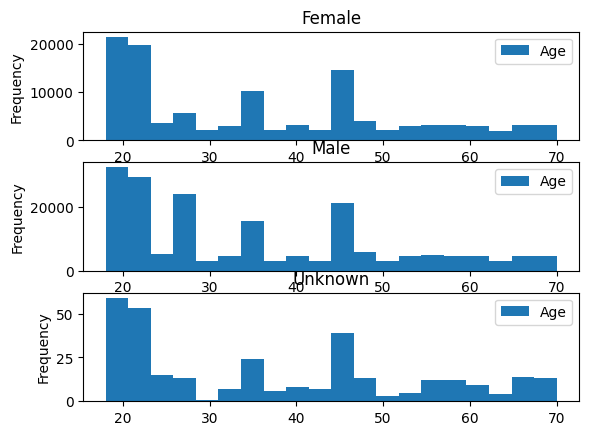

In [73]:
# Format Age column and show a histogram for all gender
pd_df["Age"] = pd_df["Age"].astype(float)
pd_df.plot.hist(column=["Age"], by="Gender", bins=20)

<Axes: >

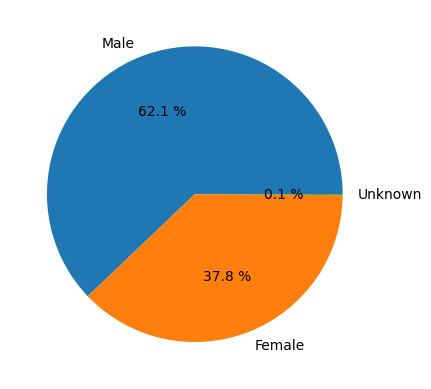

In [67]:
# Format Gender column and show a pie chart
pd_df["Income"] = pd_df["Income"].astype(float)
pd_df["Gender"].value_counts(normalize = True).plot.pie(autopct='%.1f %%', ylabel='')

<Axes: >

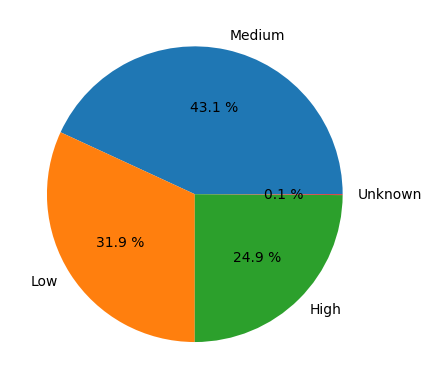

In [71]:
# Format Income column and show a pie chart
pd_df["Income"] = pd_df["Income"].fillna("Unknown").astype(str)
pd_df["Income"].value_counts(normalize = True).plot.pie(autopct='%.1f %%', ylabel='')

<Axes: >

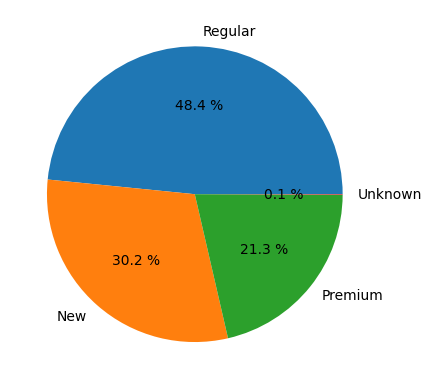

In [72]:
# Format Customer_Segment column and show a pie chart
pd_df["Customer_Segment"] = pd_df["Customer_Segment"].fillna("Unknown").astype(str)
pd_df["Customer_Segment"].value_counts(normalize = True).plot.pie(autopct='%.1f %%', ylabel='')

<Axes: >

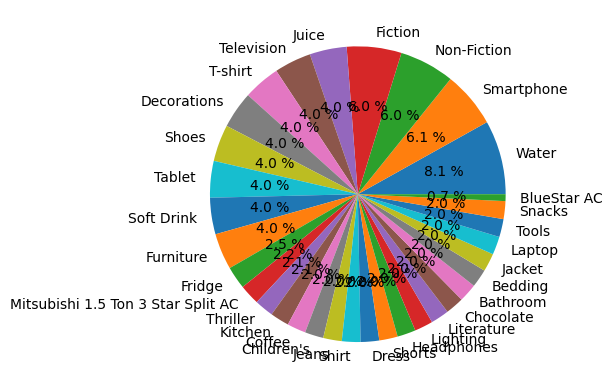

In [78]:
# Format Product_Brand column and show a hist chart
pd_df["Product_Type"] = pd_df["Product_Type"].fillna("Unknown").astype(str)
pd_df["Product_Type"].value_counts(normalize = True).plot.pie(autopct='%.1f %%', ylabel='')

<Axes: >

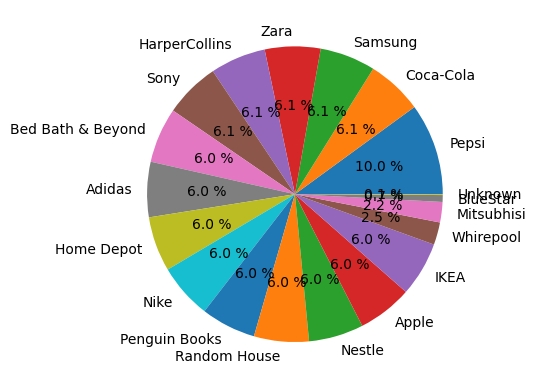

In [77]:
# Format Product_Brand column and show a hist chart
pd_df["Product_Brand"] = pd_df["Product_Brand"].fillna("Unknown").astype(str)
pd_df["Product_Brand"].value_counts(normalize = True).plot.pie(autopct='%.1f %%', ylabel='')

In [85]:
# Show a histogram for all gender
sp_df.describe("Amount", "Total_Amount", "Total_Purchases").show()

+-------+-----------------+------------------+------------------+
|summary|           Amount|      Total_Amount|   Total_Purchases|
+-------+-----------------+------------------+------------------+
|  count|           301653|            301660|            301649|
|   mean|255.1636589628455|1367.6511556240268| 5.359729354315777|
| stddev|141.3896400875466|1128.9985145052374|2.8685746269423333|
|    min|      10.00021923|       10.00374959|               1.0|
|    max|      99.99948044|       999.9940476|               9.0|
+-------+-----------------+------------------+------------------+



array([<Axes: title={'center': 'Adidas'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Apple'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Bed Bath & Beyond'}, ylabel='Frequency'>,
       <Axes: title={'center': 'BlueStar'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Coca-Cola'}, ylabel='Frequency'>,
       <Axes: title={'center': 'HarperCollins'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Home Depot'}, ylabel='Frequency'>,
       <Axes: title={'center': 'IKEA'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Mitsubhisi'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Nestle'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Nike'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Penguin Books'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Pepsi'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Random House'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Samsung'}, ylabel='Frequency'>,
       <Axes: ti

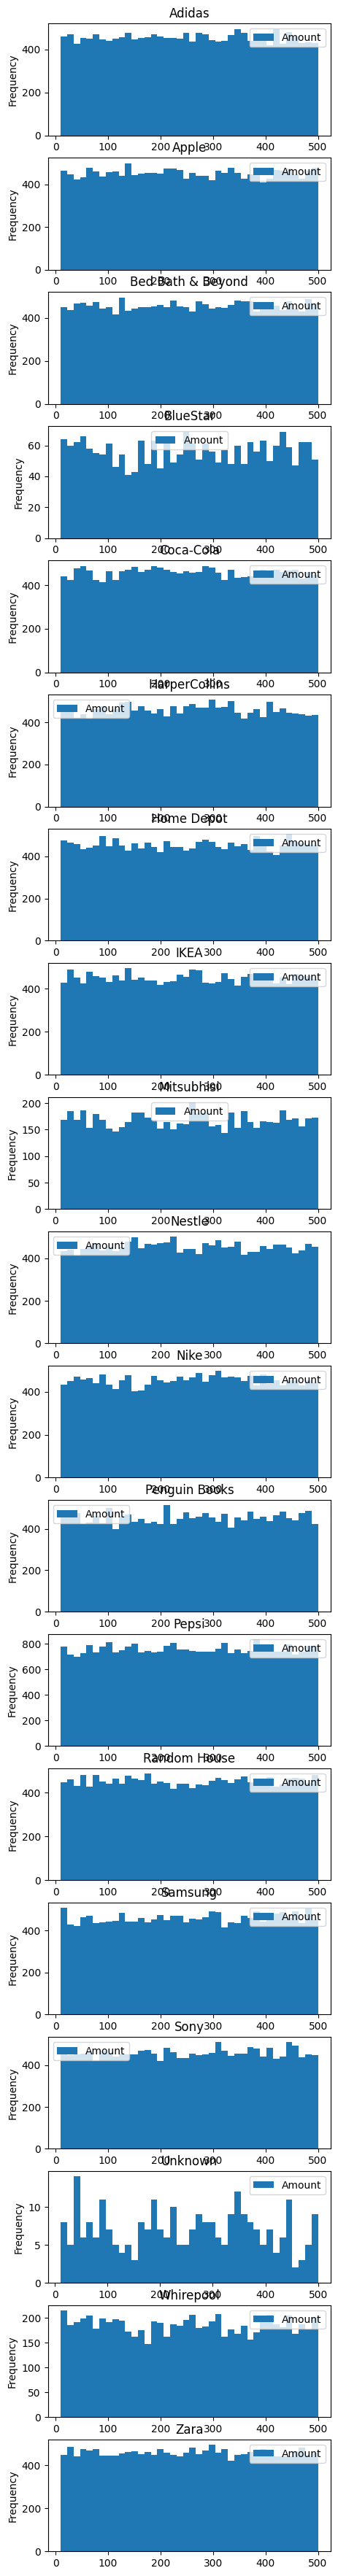

In [93]:
# Format Amount column and show a histogram for all gender
pd_df["Amount"] = pd_df["Amount"].astype(float)
pd_df.plot.hist(column=["Amount"], by="Product_Brand", bins=40, figsize=(5, 45))